<a href="https://colab.research.google.com/github/SandipanMukhopadhyay/Census-Income-project/blob/main/censusincomeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the basic libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [135]:
import warnings
warnings.filterwarnings('ignore')

Load the data

In [136]:
df = pd.read_csv('census.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Exploring the data

In [137]:
df.shape

(48842, 15)

In [138]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

object- categorical variable  
int- numerical variable

In [139]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [140]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                2
dtype: int64

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


Value Count Function

In [142]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [143]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [144]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [145]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [146]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [147]:
df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [148]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [149]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [150]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

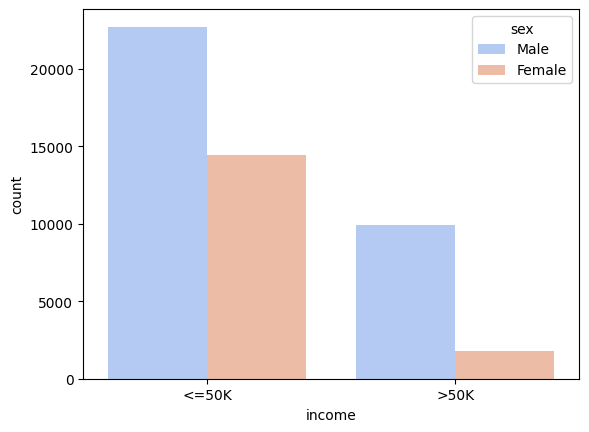

In [151]:
sns.countplot(x=df['income'], palette='coolwarm', hue ='sex', data=df);

Filling the ? values

replacing with mode

In [152]:
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','Prof-specialty')
df['native-country'] = df['native-country'].replace('?','United-States')

In [153]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Feature Engineering

In [154]:
#education category
df.education= df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'school')
df.education= df.education.replace('HS-grad','high school')
df.education= df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'], 'higher')
df.education= df.education.replace('Bachelors','undergrad')
df.education= df.education.replace('Masters','grad')
df.education= df.education.replace('Doctorate','doc')

In [155]:
#marital status
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']= df['marital-status'].replace(['Never-married'],'not-married')
df['marital-status']= df['marital-status'].replace(['Divorced','Separated','Married-spouse-absent','Widowed'],'other')

In [156]:
#income
df.income= df.income.replace('<=50K','0')
df.income= df.income.replace('>50K','1')

In [157]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,higher,10,not-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [158]:
df['marital-status'].value_counts()

married        22416
not-married    16117
other          10309
Name: marital-status, dtype: int64

In [159]:
df['education'].value_counts()

high school    15784
higher         15374
undergrad       8025
school          6408
grad            2657
doc              594
Name: education, dtype: int64

In [160]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [164]:
df['income']=df['income'].astype('int64')

In [265]:
#correlation
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<Axes: >

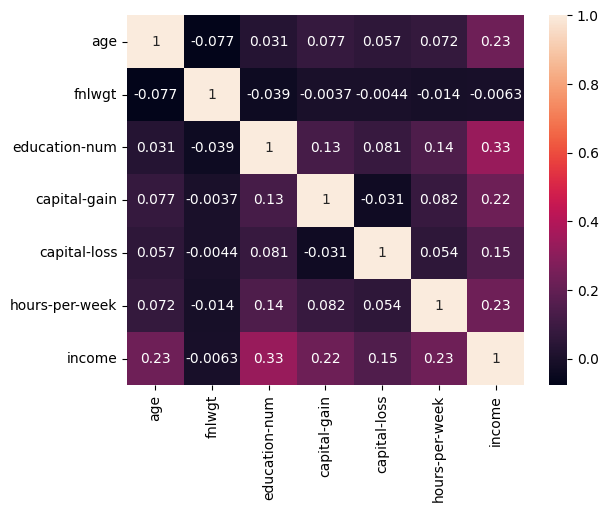

In [166]:
sns.heatmap(df.corr(),annot=True)

Histogram

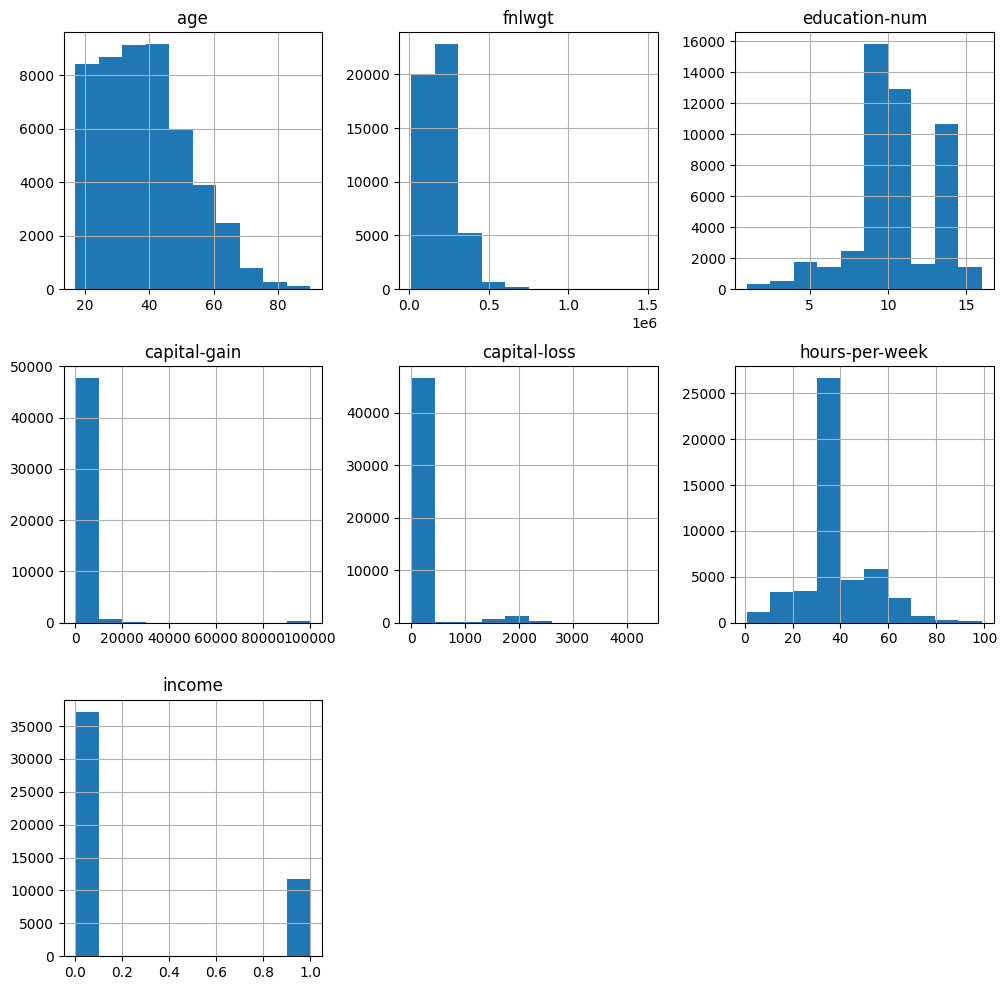

In [167]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

Boxplot

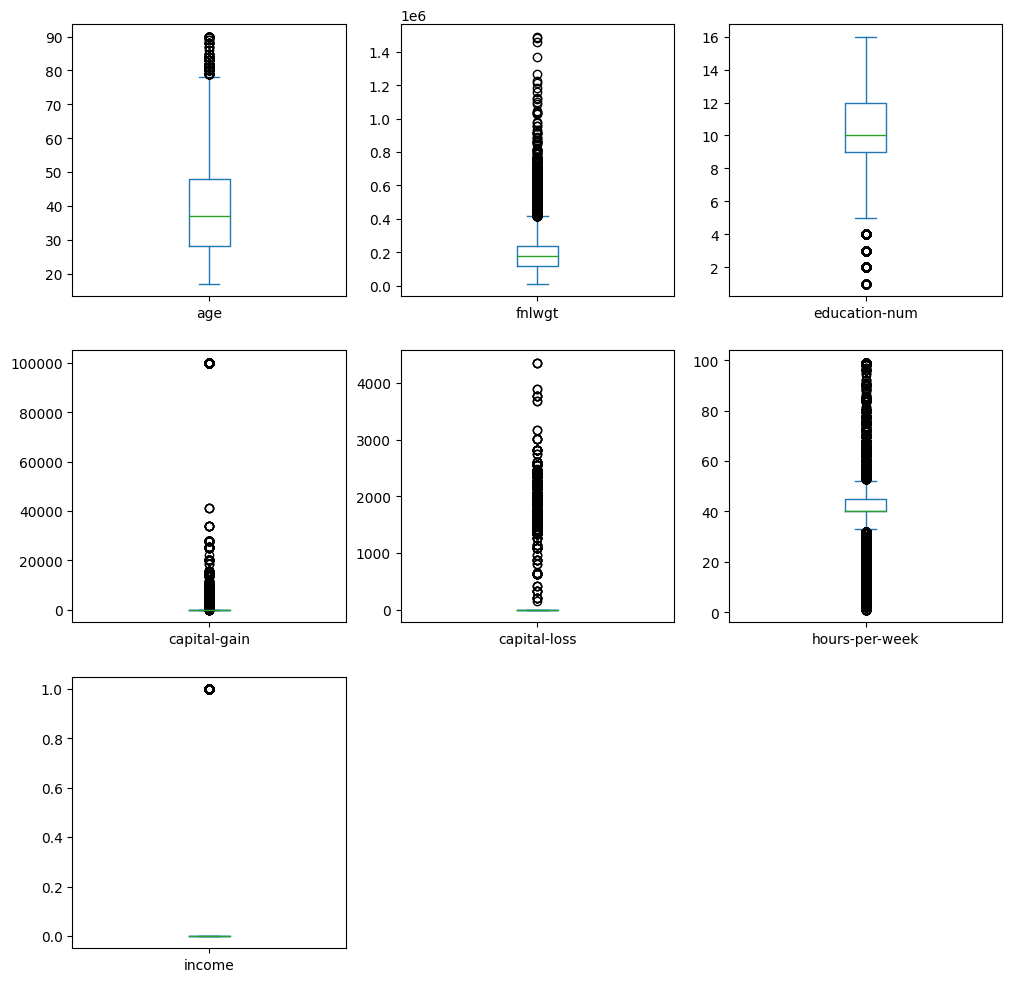

In [168]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False, subplots=True);

plotly

In [169]:
px.pie(df, values='education-num', names='education',title='% of education',color_discrete_sequence = px.colors.qualitative.T10)

In [170]:
px.scatter(df, x="capital-gain", y="hours-per-week", color="sex", title="Scatter Plot of Capital-gain and Hours-per-week as per Gender")

In [171]:
px.pie(df, values='hours-per-week', names='occupation',color_discrete_sequence = px.colors.sequential.RdBu,title='Pie chart showing occupation and hours per week')

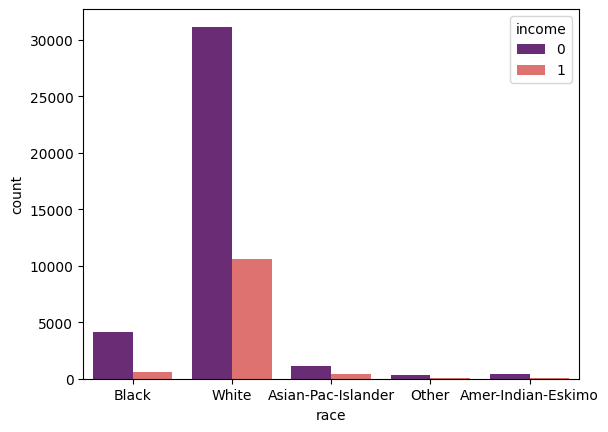

In [172]:
sns.countplot(x=df['race'], hue='income', data=df, palette='magma');

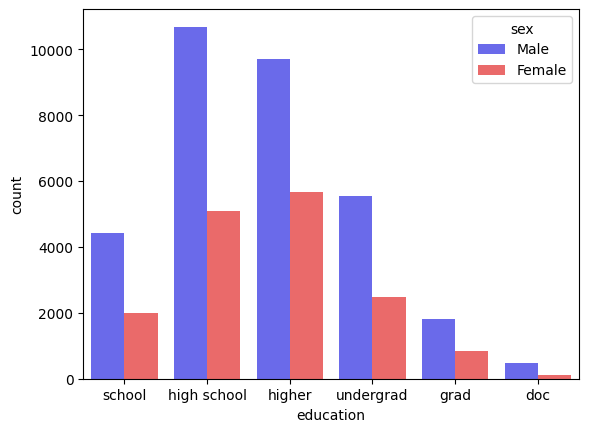

In [173]:
sns.countplot(x=df['education'], hue='sex', data=df, palette='seismic');

Model Building

In [174]:
X= df.drop(['income'],axis=1)
y = df['income']

Feature Scaling

In [175]:
from sklearn.preprocessing import StandardScaler ,LabelEncoder

In [176]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,4,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,3,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,3,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,3,9,1,9,3,4,0,0,0,29,38,0


In [177]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [178]:
X= ss.transform(df1.drop('income',axis=1))
y= df['income']

implementing Smote and enn

In [179]:
from imblearn.combine import SMOTEENN

In [180]:
# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [181]:
y_resampled.value_counts()

1    30190
0    26216
Name: income, dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

print("Accuracy :{:,.2f}".format(lr.score(X_test,y_test)*100))

Accuracy :84.54


Random Forest Classifier

In [258]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print("Accuracy :{:,.2f}".format(rfc.score(X_test,y_test)*100))

Accuracy :86.50


Decission Tree Classifier

In [260]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
accuracy_score(y_test,prediction2)
print("Accuracy on test data:{:,.2f}".format(dtc.score(X_test,y_test)*100))

Accuracy on test data:81.87


XGboost

In [188]:
import xgboost as xgb

In [189]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [262]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

Accuracy: 87.70900156964444


Neural Network

In [191]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred = neural.predict(X_test)

In [192]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [249]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Neural_Accuracy=neural.score(X_test, y_test)
print(f'The Accuracy of the Model is {Neural_Accuracy*100}')

The Accuracy of the Model is 85.70941104210742


confusion matrix

In [194]:
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import classification_report

In [195]:
print(confusion_matrix(y_test,prediction1))

[[10474   759]
 [ 1231  2189]]


In [196]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.74      0.64      0.69      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653



Precission: tp/tp+fp

In [197]:
print('Precision =' , 6887/(6887+865))

Precision = 0.8884158926728586


Recall= tp/tp+fn

In [198]:
print('Recall =', 6887/(6887+526))

Recall = 0.9290435721030622


for other class : 1(>50k)

In [199]:
print('precission = ', 1491/(1491+526))

precission =  0.7392166584035696


In [200]:
print('recall =', 1491/(1491+865))

recall = 0.6328522920203735


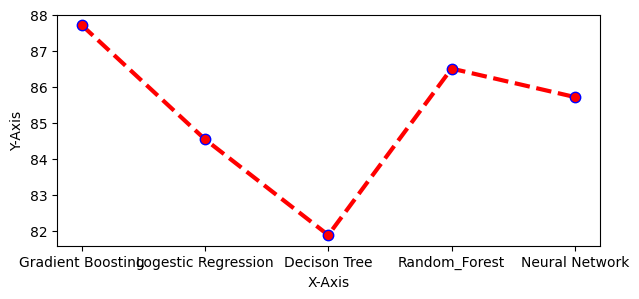

In [266]:
x=['Gradient Boosting','Logestic Regression','Decison Tree','Random_Forest','Neural Network']
y=[accuracy*100,lr.score(X_test,y_test)*100,dtc.score(X_test,y_test)*100,rfc.score(X_test,y_test)*100,Neural_Accuracy*100]

#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(3)

## Label , Line Proporties and marker Properties
plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")

## Adding a label and Font parameters
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")


## To Show Plot(Else will get unnecessary address)
plt.show()